In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob as glob

# plot function
def plot(df, name):
    name = name.replace('.dat', '')
    for i, v in enumerate(df['ave-time-per-step']):
        plt.plot(i, v, 'o', color=get_color(v))
    plt.xlabel('reg test #')
    plt.ylabel('ave time per step (s)')
    plt.title('bench ' + name.split('_')[-1])
    plt.ylim(-0.20, max(0, 1.1*df['ave-time-per-step'].max()))
    plt.grid()
    

def get_color(v):
    c = 'tab:blue'
    if v < 0:
        c = 'tab:red'
    elif 0 < v < 3:
        c = 'tab:orange'
    return c
        


# Read the data
fnames = sorted(glob.glob('*.dat'))
dfs = [pd.read_csv(fname) for fname in fnames]
tlast_list = [df['ave-time-per-step'].iloc[-1] for df in dfs]

# print last values
print('Last values:')
for fname, tlast in zip(fnames, tlast_list):
    print(f'\t{fname}: {tlast}')

Last values:
	tpstep_01.dat: 3.23237
	tpstep_02.dat: -0.0987654
	tpstep_03.dat: 2.67857
	tpstep_04.dat: 1.9645299999999999
	tpstep_05.dat: -0.0987654
	tpstep_06.dat: -0.0987654
	tpstep_07.dat: -0.0987654


Text(0.5, 0, 'Average time per step [s]')

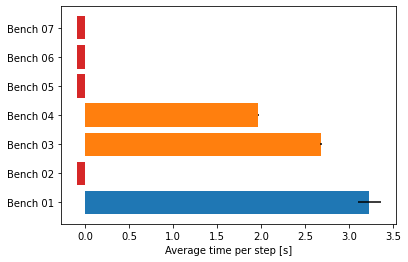

In [2]:
means = np.asarray([df['ave-time-per-step'].mean() for df in dfs])
std = np.asarray([df['ave-time-per-step'].std() for df in dfs])

names = ['Bench ' + fname.replace('.dat', '').split('_')[-1] for fname in fnames]

plt.barh(names, means, xerr=std*2, color=[get_color(v) for v in means])
plt.xlabel('Average time per step [s]')

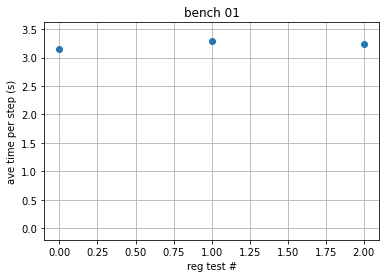

In [3]:
plot(dfs[0], fnames[0])

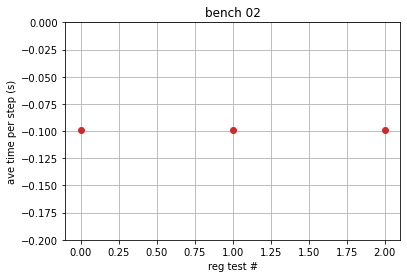

In [4]:
plot(dfs[1], fnames[1])

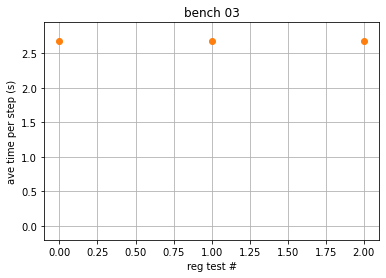

In [5]:
plot(dfs[2], fnames[2])

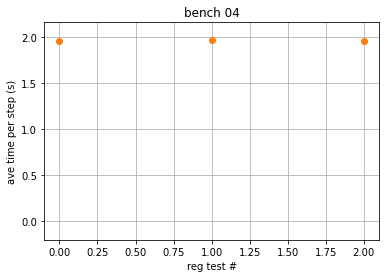

In [6]:
plot(dfs[3], fnames[3])

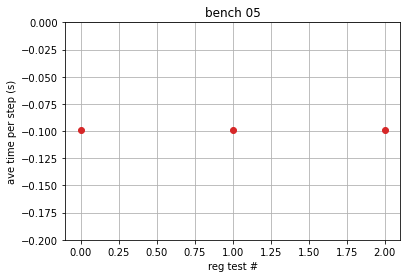

In [7]:
plot(dfs[4], fnames[4])

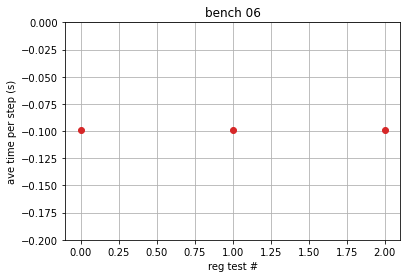

In [8]:
plot(dfs[5], fnames[5])

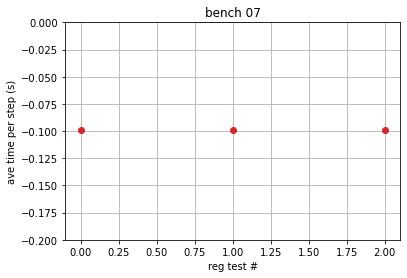

In [9]:
plot(dfs[6], fnames[6])